In [2]:
import pandas as pd
import numpy as np
from TextureAnalysis.GLHA import GLHA
from TextureAnalysis.GLCM import GLCM
from TextureAnalysis.RegionProps import RegionProps
from matplotlib import pyplot as plt
from scipy import ndimage


In [3]:
#read the pandas dataframe

#path = r'INPUT PATH'
path = r'C:\Users\Teresa\Desktop\TESE\Textural Analysis'

#df_name = r'NAME OF INPUT DF'
df_name = r'FINAL_normalized_PLUS_automatic_labels_02_06_19.pickle'
 
df_path = path +'\\' + df_name

df = pd.read_pickle(df_path)
df

,Area,Image,Mean Green,Mean Intensity,Mean Red,Normalized Mean Green,Normalized Mean Red,Normalized Total Green,Normalized Total Red,Nucleus Patch,Total Green,Total Intensity,Total Red,norm_area,norm_intensity,Automatic Label
0,4155.0,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,12.619976,99.934296,46.411793,0.262386,0.964963,0.262386,0.964963,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",52436,415227.0,192841,-0.810298,-0.400080,0
3,4760.0,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,29.452311,93.733613,37.138025,0.621369,0.783518,0.621369,0.783518,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",140193,446172.0,176777,-0.235171,-0.157327,0
4,5014.0,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,6.779418,88.923215,86.455325,0.078175,0.996940,0.078175,0.996940,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",33992,445861.0,433487,0.006287,-0.159767,0
6,5503.0,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,10.632564,87.747229,73.093949,0.143949,0.989585,0.143949,0.989585,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",58511,482873.0,402236,0.471142,0.130580,0
7,5800.0,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,7.822759,75.415172,120.578621,0.064741,0.997902,0.064741,0.997902,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",45372,437408.0,699356,0.753477,-0.226077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,5145.0,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,77.881633,78.721088,4.357629,0.998438,0.055865,0.998438,0.055865,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",400701,405020.0,22420,0.846486,0.406772,1
8614,4802.0,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,52.264681,75.847355,2.954602,0.998406,0.056441,0.998406,0.056441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",250975,364219.0,14188,0.555638,0.137100,1
8615,3566.0,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,17.987942,77.492989,39.335109,0.415878,0.909420,0.415878,0.909420,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",64145,276340.0,140269,-0.492433,-0.443732,0
8617,4908.0,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,51.481866,117.655868,7.560106,0.989389,0.145292,0.989389,0.145292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",252673,577455.0,37105,0.645521,1.546473,1


In [3]:
final_glha = []
final_glcm = []
final_props = []

for index, row in df.iterrows():

        patch = row['Nucleus Patch'] #obtain the nucleus patch
        
        #normalize the patch
    
        minn = np.min(patch)
        maxx = np.max(patch)
        ones = np.ones(np.shape(patch))
        ones = ones * minn
    
        patch = (patch - ones) /(maxx - minn)
        patch = patch*255.0
        patch = patch.astype('uint8')
        
        
        patch_h = patch[patch>0] #gets only the values where intensity is !=0
        
        
        #calculate features
        glha = GLHA(patch_h, level_min=0, level_max=255, threshold=None)
        glcm = GLCM(patch)
        props = RegionProps(patch)
        
        #obtain feature labels (invariant) and their values
        glha_labels, glha_values = glha.print_features(print_values = False)
        glcm_labels, glcm_values = glcm.print_features(print_values = False)
        prop_labels, prop_values = props.print_features(print_values = False)
        
        
       #add each feature to its respective list, which will then be put into the dataframe
        for i in np.arange(len(glha_values)):
            if len(final_glha) < len(glha_values):
                    final_glha.append([glha_values[i]])
            else:
                final_glha[i].append(glha_values[i])
                
        for i in np.arange(len(glcm_values)):
            if len(final_glcm) < len(glcm_values):
                    final_glcm.append([glcm_values[i]])
            else:
                final_glcm[i].append(glcm_values[i])
                
        for i in np.arange(len(prop_values)):
            if len(final_props) < len(prop_values):
                    final_props.append([prop_values[i]])
            else:
                final_props[i].append(prop_values[i])
                
                
                

#print(final_glha)
#print(final_glcm)
#print(final_props)




C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [4]:
#add features to dataframe and visualize

for i in np.arange(len(glha_labels)):
    df[glha_labels[i]] = final_glha[i]
    
for i in np.arange(len(glcm_labels)):
    df[glcm_labels[i]] = final_glcm[i]

for i in np.arange(len(prop_labels)):
    df[prop_labels[i]] = final_props[i]

df

,Area,Image,Mean Green,Mean Intensity,Mean Red,Normalized Mean Green,Normalized Mean Red,Normalized Total Green,Normalized Total Red,Nucleus Patch,...,Equivalent Diameter,Major Axis Length,Minor Axis Length,Max Intensity,Min Intensity,Orientation,Perimeter,Solidity,Entropy,Circularity
0,4155,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,12.619976,125.657280,46.411793,0.262386,0.964963,0.262386,0.964963,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,72.734519,93.715394,56.642633,255,44,0.884948,248.350288,0.983199,5.579251,0.846548
3,4760,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,29.452311,120.828992,37.138025,0.621369,0.783518,0.621369,0.783518,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,77.849985,93.066080,65.323570,255,40,1.412099,258.894444,0.992287,6.150013,0.892424
4,5014,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,6.779418,114.041284,86.455325,0.078175,0.996940,0.078175,0.996940,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.900082,88.914160,72.074866,255,46,-1.500195,261.722871,0.990518,5.924569,0.919837
6,5503,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,10.632564,106.558968,73.093949,0.143949,0.989585,0.143949,0.989585,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,83.705658,89.324967,78.566344,255,39,-0.744969,271.764502,0.993142,5.826534,0.936319
7,5800,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,7.822759,116.757931,120.578621,0.064741,0.997902,0.064741,0.997902,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,85.934797,88.987739,83.083881,255,48,-1.071380,279.764502,0.992131,5.580421,0.931221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,5145,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,77.881633,152.714480,4.357629,0.998438,0.055865,0.998438,0.055865,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,80.937120,91.817259,71.901276,255,46,-1.451276,273.764502,0.985632,5.352308,0.862663
8614,4802,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,52.264681,136.686381,2.954602,0.998406,0.056441,0.998406,0.056441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,78.192687,84.966272,71.992936,255,57,0.596904,258.107648,0.986239,5.435626,0.905796
8615,3566,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,17.987942,127.823331,39.335109,0.415878,0.909420,0.415878,0.909420,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,67.382284,77.833736,58.528837,255,52,-1.448471,228.409163,0.978864,5.656561,0.858943
8617,4908,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,51.481866,152.560921,7.560106,0.989389,0.145292,0.989389,0.145292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.050994,79.792635,78.405947,255,59,-1.557158,261.622366,0.985542,6.055117,0.901083


In [5]:
#save the new dataframe

#path = r'OUTPUT PATH'
path = r'C:\Users\Teresa\Desktop\TESE\Textural Analysis'

#df_name = r'NAME OF NEW DF'
df_name = r'normalized.pickle'
 
df_path = path +'\\' + df_name

df.to_pickle(df_path)

#if wanting to save to xlsx file, uncomment the following:
excel_name = r'normalized.xlsx'
df_path =  path +'\\' + excel_name
df.to_excel(df_path) 



----GLHA-----
Mean: 140.7612551159618
Std: 32.82417900343395
Variance: 1077.4267272494742
Skewness: 0.03948039839242218
Kurtosis: -0.16039977762345403


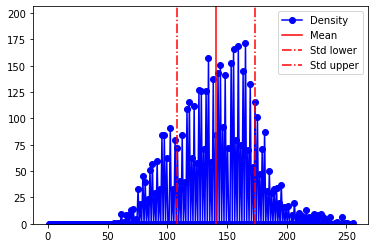

----GLCM-----
Uniformity: [1317514, 1148176, 1428485, 1153002]
Invariant Uniformity: 20088577.0
GLCM Entropy: [0.22816155892338438, 0.2389606223700024, 0.22643825340854015, 0.23861594975907582]
GLCM Invariant Entropy: 0.38876286133397736
Correlation: [0.95862222 0.94930794 0.96988463 0.94709677]
Invariant Correlation: 0.9563938320984271
Dissimilarity: [ 9.88794192 11.31738437  8.99890024 11.35119617]
Invariant Dissimilarity: 10.382314488332476
Contrast: [326.7645202  392.12759171 239.69426551 409.06953748]
Invariant Contrast: 341.48963987163745
Homogeneity: [0.26884475 0.2505601  0.28255261 0.25631725]
Invariant Homogeneity: 0.2646475446997683
Energy: [0.18116006 0.17089789 0.18777572 0.17125667]
Invariant Energy: 0.1775693603232152
----RegionProps-----
Area: 5131
BB Area: 6432
Centroid: (46.30851685831222, 32.18768271292146)
Weighted Centroid: (46.96386826649092, 31.62155692104906)
Centroid Divergence: 0.8660160970934425
Eccentricity: 0.7202010864766492
Equivalent Diameter: 80.8269268

In [6]:
#(extra)
#analyse features for last nucleus of df

glha_labels, glha_values = glha.print_features(show_figure=True)
glcm_labels, glcm_values = glcm.print_features()
prop_labels, prop_values = props.print_features()
